In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
plt.rcParams.update({
    "font.size": 16,          # default font size
    "axes.labelsize": 18,     # x and y labels
    "axes.titlesize": 18,     # title size
    "xtick.labelsize": 16,    # x tick labels
    "ytick.labelsize": 16,    # y tick labels
    "legend.fontsize": 16     # legend
})

In [3]:
#df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","d_reacted_carbon","all_carbon"])


def sort_eff_vals(filename,target_thickness):

    if (target_thickness == "thin"):
        targettype = "c_54"
    if (target_thickness == "medium"):
        targettype = "c_1086"
    if (target_thickness == "thick"):
        targettype = "c_2198"
    if (target_thickness == "empty"):
        targettype = "empty"
        
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg"])
    #df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g"]) # prelim version

    
    eff_list = []
    
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        d_red = df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]
        #print(d_red.shape)
        #print(type(d_red))
        #print(d_red.iloc[:, 4:])
        vals = d_red.iloc[:, 4:].values.tolist()
        eff_list.append(vals)

    return eff_list

In [4]:
#file = "comb_multiwire_eff.txt"
file = "comb_multiwire_eff_low_thr_mw2y.txt"

In [5]:
thin_vals = sort_eff_vals(file,"thin")
medium_vals = sort_eff_vals(file,"medium")
thick_vals = sort_eff_vals(file,"thick")
empty_vals = sort_eff_vals(file,"empty")

In [6]:
print((empty_vals))
npa = np.asarray(empty_vals)

[[], [], [], []]


In [7]:
print(npa)

[]


In [8]:
print(npa.shape)
squeezed_npa = np.squeeze(npa)

(4, 0)


In [9]:
squeezed_npa.shape

(4, 0)

In [10]:
npa.shape

(4, 0)

In [11]:
#file = "final_eff_mw123.txt"
file = "comb_mw123_check_400thr_mw3.txt" ##with threshold 400 at MW3

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<clas

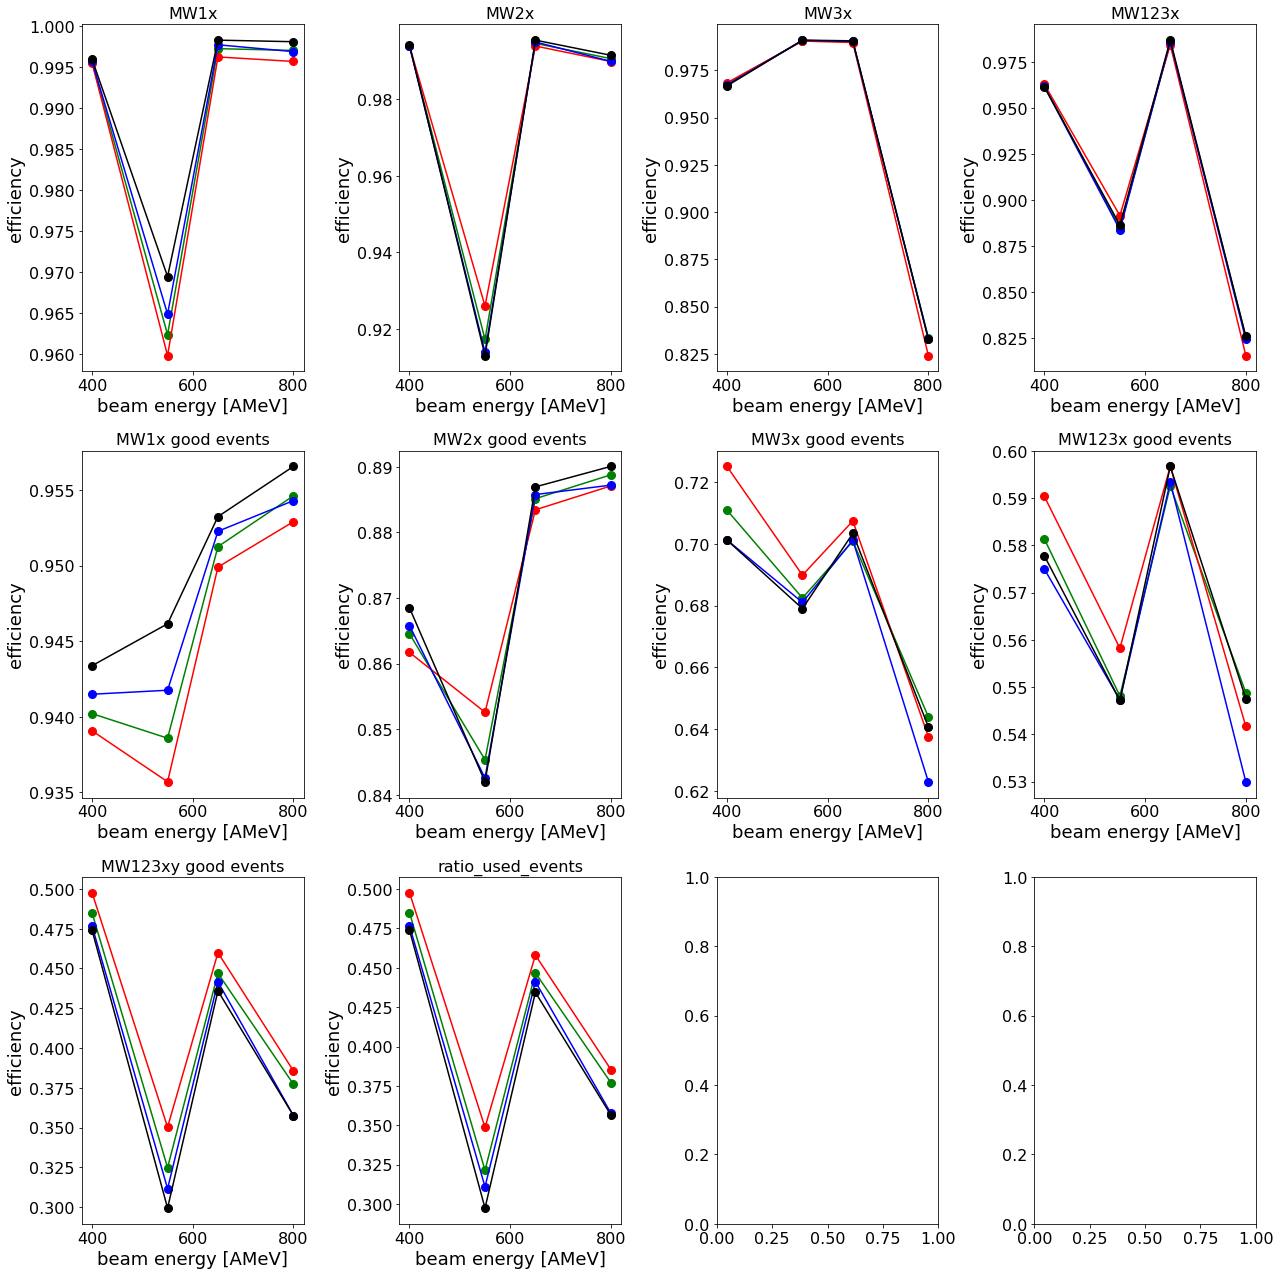

In [12]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(3,4,figsize=(18,18))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW1x","MW2x","MW3x","MW123x","MW1x good events","MW2x good events","MW3x good events","MW123x good events","MW123xy good events","ratio_used_events"])):

    for target in targets:
        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()
        y_vals = subset.iloc[:,4+i].tolist()
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            markersize=8
        )
        axi.set_title(t,fontsize=16)
        axi.set_xlabel("beam energy [AMeV]")
        axi.set_ylabel("efficiency")
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<clas

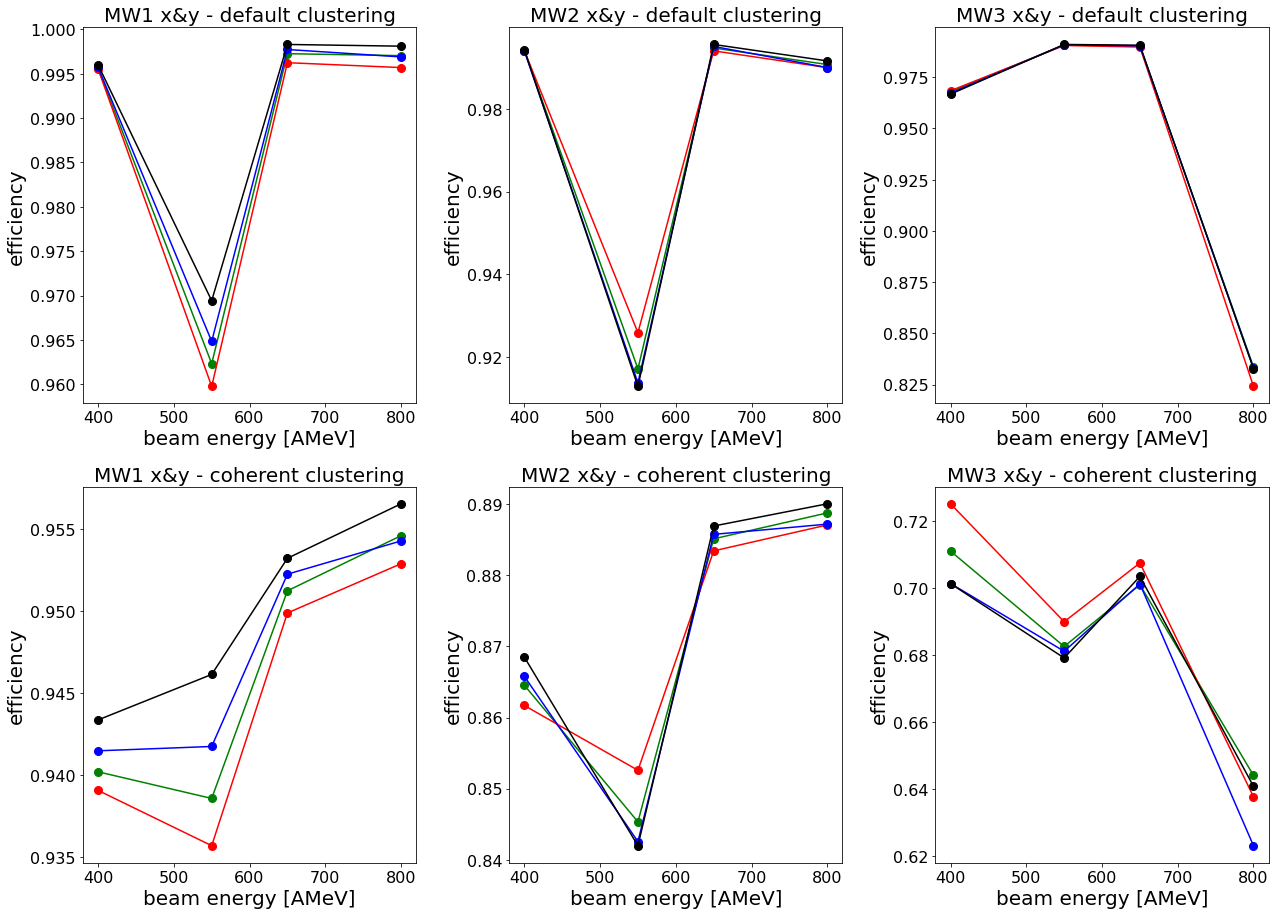

In [13]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(2,3,figsize=(18,13))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW1 x&y - default clustering","MW2 x&y - default clustering","MW3 x&y - default clustering","MW1 x&y - coherent clustering","MW2 x&y - coherent clustering","MW3 x&y - coherent clustering"])):

    for target in targets:

        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()

        
        if (i < 3):
            y_vals = subset.iloc[:,4+i].tolist()
        else:
            y_vals = subset.iloc[:,5+i].tolist()
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            linestyle="-",
            markersize=8
        )
        axi.set_title(t,fontsize=20)
        axi.set_xlabel("beam energy [AMeV]",fontsize=20)
        axi.set_ylabel("efficiency",fontsize=20)
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()
plt.savefig("eff_plot_mwpcs.png",dpi=300,bbox_inches='tight')

#### separate plots

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_efficiencies(file):
    # === Read data ===
    df = pd.read_csv(file, sep='\t', names=[
        "datatype","targettype","RunID","energy",
        "e_x1","e_x2","e_x3","e_x123",
        "e_x1g","e_x2g","e_x3g","e_x123g",
        "e_123_xyg","e_123used"
    ])

    # === Configuration ===
    targets = df["targettype"].unique()
    colors = ["green", "red", "blue", "black"]
    color_map = dict(zip(targets, colors))

    # Plot titles and corresponding y-column indices
    plot_info = [
        ("MW1 x&y - default clustering", 4),
        ("MW2 x&y - default clustering", 5),
        ("MW3 x&y - default clustering", 6),
        ("MW1 x&y - coherent clustering", 8),
        ("MW2 x&y - coherent clustering", 9),
        ("MW3 x&y - coherent clustering", 10)
    ]

    # === Create and save each plot separately ===
    for title, y_index in plot_info:
        plt.figure(figsize=(8, 6))
        for target in targets:
            subset = df[df["targettype"] == target]
            x_vals = subset["energy"].tolist()
            y_vals = subset.iloc[:, y_index].tolist()

            plt.plot(
                x_vals,
                y_vals,
                label=target,
                color=color_map[target],
                marker="o",
                linestyle="-",
                markersize=8
            )

        plt.title(title, fontsize=18)
        plt.xlabel("Beam energy [AMeV]", fontsize=18)
        plt.ylabel("Efficiency", fontsize=18)
        plt.grid(True, linestyle='--', alpha=0.6)
        if y_index == 10:
            plt.legend(fontsize=15)
        plt.tight_layout()

        # Generate a filename based on the title
        filename = title.lower().replace(" ", "_").replace("&", "and").replace("-", "").replace("__", "_")
        plt.savefig(f"{filename}.png", dpi=300, bbox_inches='tight')
        plt.close()

    print("✅ Saved all individual efficiency plots successfully.")

# Example usage:
plot_efficiencies("comb_mw123_check_400thr_mw3.txt")


✅ Saved all individual efficiency plots successfully.


#### -----------------------------------------

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


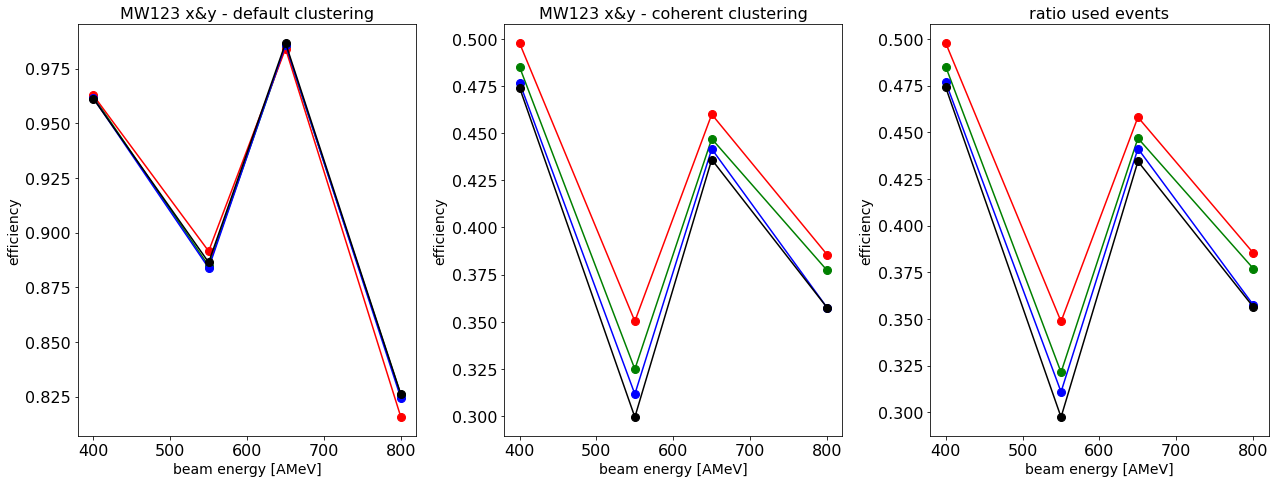

In [15]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(1,3,figsize=(18,7))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
list_of_data = [7,12,13]
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW123 x&y - default clustering","MW123 x&y - coherent clustering","ratio used events"])):

    for target in targets:
        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()
        y_vals = subset.iloc[:,list_of_data[i]].tolist()
        
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            markersize=8
        )
        axi.set_title(t,fontsize=16)
        axi.set_xlabel("beam energy [AMeV]",fontsize=14)
        axi.set_ylabel("efficiency",fontsize=14)
        if (i ==3):
            axi.set_ylabel("ratio used events",fontsize=14)
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()
plt.savefig("combined_eff_plot_mwpcs.png",dpi=300,bbox_inches='tight')

### nice plots:

/home/tobiasjenegger/jupy/jup_notebook/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/tobiasjenegger/jupy/jup_notebook/lib/python3.6/site-packages/ipykernel_launcher.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


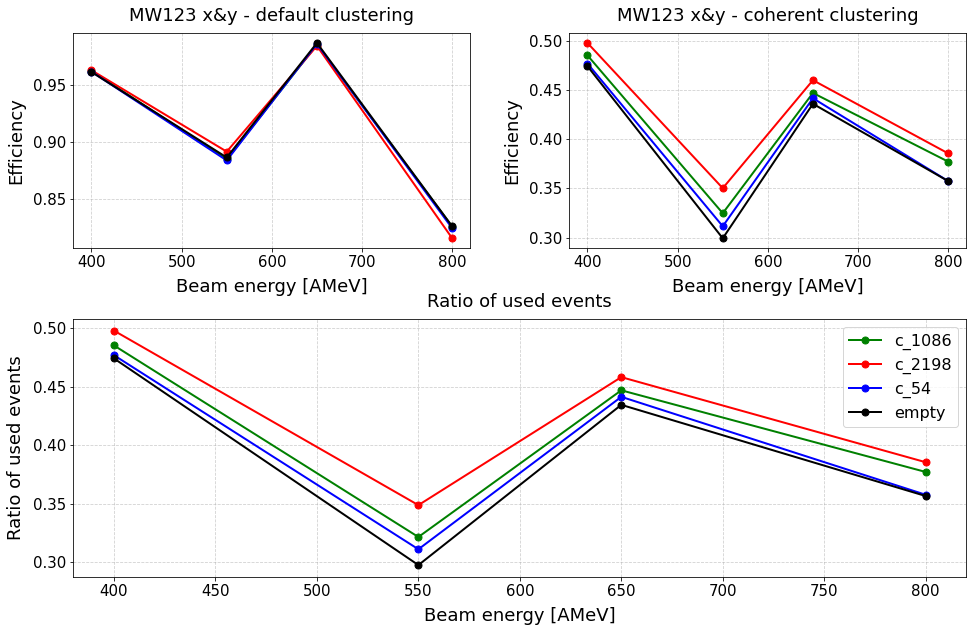

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# === Read data ===
df = pd.read_csv(
    file,
    sep='\t',
    names=[
        "datatype", "targettype", "RunID", "energy",
        "e_x1", "e_x2", "e_x3", "e_x123",
        "e_x1g", "e_x2g", "e_x3g", "e_x123g",
        "e_123_xyg", "e_123used"
    ]
)

# === Prepare configuration ===
targets = df["targettype"].unique()
colors = ["green", "red", "blue", "black"]
color_map = dict(zip(targets, colors))

titles = [
    "MW123 x&y - default clustering",
    "MW123 x&y - coherent clustering",
    "Ratio of used events"
]
y_indices = [7, 12, 13]

# === Create figure with GridSpec layout ===
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2], hspace=0.3, wspace=0.25)

ax1 = fig.add_subplot(gs[0, 0])   # top left
ax2 = fig.add_subplot(gs[0, 1])   # top right
ax3 = fig.add_subplot(gs[1, :])   # bottom (spanning both columns)
axes = [ax1, ax2, ax3]

# === Plot each panel ===
for i, (axi, title, y_idx) in enumerate(zip(axes, titles, y_indices)):
    for target in targets:
        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()
        y_vals = subset.iloc[:, y_idx].tolist()

        axi.plot(
            x_vals, y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            linestyle="-",
            linewidth=2,
            markersize=7
        )

    # === Aesthetics ===
    #axi.set_title(title, fontsize=18, weight="bold", pad=12)
    axi.set_title(title, fontsize=18, pad=12)
    axi.set_xlabel("Beam energy [AMeV]", fontsize=18, labelpad=8)
    axi.set_ylabel(
        "Efficiency" if i < 2 else "Ratio of used events",
        fontsize=18,
        labelpad=8
    )
    axi.tick_params(axis='both', which='major', labelsize=15)
    axi.grid(True, linestyle='--', alpha=0.6)
    if i > 1:
        handles, labels = ax1.get_legend_handles_labels()
        axi.legend(handles, labels)
    
fig.tight_layout()
# Add a single shared legend below all plots
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(
#    handles, labels,
#    loc='lower center',
#    ncol=len(targets),
#    fontsize=13,
#    frameon=False,
#    bbox_to_anchor=(0.5, -0.03)
#)

# === Final layout and save ===
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("combined_eff_plot_mwpcs.png", dpi=300, bbox_inches='tight')
plt.show()
